In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences, peak_widths
from scipy.optimize import curve_fit
from scipy import integrate as intg

# Function to calculate the Gaussian with constants a, b, and c
def gaussian(x, a, b, c):
    return a*np.exp(-np.power(x - b, 2)/(2*np.power(c, 2)))

In [2]:
globbed_files = glob.glob("*.txt")

frame=[]
for txt in globbed_files:
    
    tmp = pd.read_csv(txt, sep="\t")

    # Add filename as column (make sure that filename.txt is the experiment number)
    exp_no=os.path.splitext(txt)[0]
    tmp['Exp No']=exp_no

    # Change hh:mm:ss format into seconds
    tmp['Relative Time'] = tmp['Relative Time'].str.split(':').apply(lambda x :int(x[0]) * 3600 + int(x[1]) * 60 + int(x[2])) # Why does this work?
    
    # Then back into more useful minutes - REMOVE LINE BELOW IF YOU WANT SECONDS
    tmp['Relative Time'] = tmp['Relative Time'].astype(int)/60
    
    frame.append(tmp)
    
ir_data = pd.concat(frame, ignore_index=True)
    
#ir_data

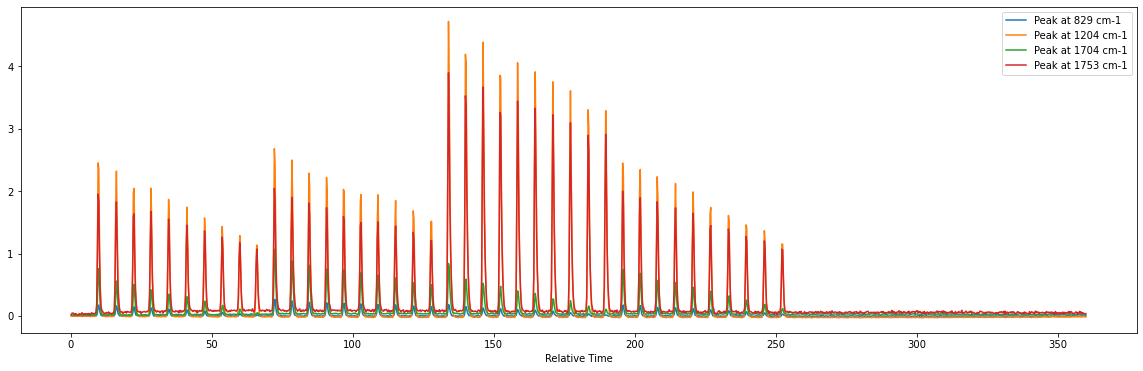

In [3]:
# Visualise the data
fig = ir_data.plot(x='Relative Time',figsize=(20,6))

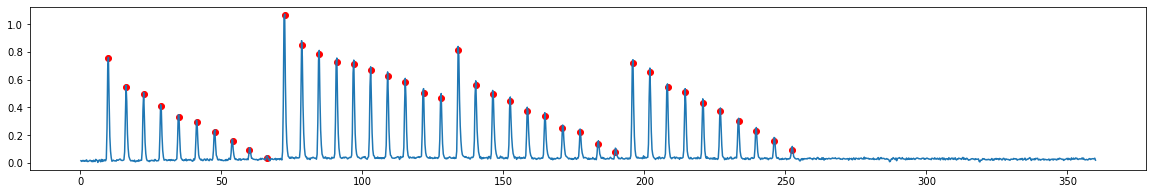

In [4]:
# Peak of interest - EASIEST TO PICK A SINGLE WAVENUMBER
peak_of_interest = 'Peak at 1704 cm-1'

# Find the peaks using their prominence 
peak_threshold = 0.032

x = ir_data[peak_of_interest]
peaks = find_peaks(x, prominence = peak_threshold)
peak_prominence = peaks[1]
peak_pos = ir_data['Relative Time'][peaks[0]]
#peak_prominence
#peak_pos

# Plot Data
fig = plt.figure(figsize=(20,3))
ax = fig.subplots()
tmp = pd.DataFrame(peak_prominence)
tmp2 = pd.DataFrame(peak_pos)
ax.plot(ir_data['Relative Time'], ir_data[peak_of_interest])
ax.scatter(tmp2['Relative Time'], tmp['prominences'], color='r')

In [11]:
# Make it a list
list_of_peaks = list(peak_pos)

fitted_area = []
experimental_area = []

# Peak residence time - NEEDS ADJUSTING
residence_time = 4 

for var in list_of_peaks:
    
    # Find a single peak
    single_peak = ir_data.loc[(ir_data['Relative Time'] >= var - (residence_time/2-0.7)) 
                            & (ir_data['Relative Time'] <= var + (residence_time/2+0.3))]

    # Fit Gaussian and find parameters - p0 VALUES ARE INITIAL GUESSES AND WILL NEED ADJUSTING IF THIS FAILS
    X = np.arange(0, len(single_peak))
    pars, cov = curve_fit(f=gaussian, xdata=X, ydata=single_peak[peak_of_interest], p0=[5, -1, 2], bounds=(-np.inf, np.inf))

    # Find area (function, starting point, end point, args=arguments to use in function)
    peak_area = intg.quad(gaussian, 0, len(single_peak)-1, args=(pars[0],pars[1],pars[2]))
       
    # Find peak area of the experimental data
    exp_peak_area = np.trapz(single_peak[peak_of_interest])
    
    fitted_area.append(peak_area[0])
    experimental_area.append(exp_peak_area)
    
    
# Plot fitted area
# plt.scatter(np.arange(0, len(fitted_area)), fitted_area, label='Fitted Area')
# plt.scatter(np.arange(0, len(experimental_area)), experimental_area, label='Experimental Area')
# plt.xlabel("Peak Index")
# plt.ylabel("Peak Area")
# plt.title("Areas")
# plt.legend()
# plt.tight_layout()
experimental_area

[2.5593396999999998,
 1.9129269000000004,
 1.65535134,
 1.4940796500000002,
 1.3253792500000001,
 1.15791935,
 0.9577379999999999,
 0.7817908000000001,
 0.5902342500000001,
 0.4067549,
 3.9300191,
 3.21439625,
 3.0210382,
 2.8681381999999997,
 2.7164748000000003,
 2.4886312000000004,
 2.3587572,
 2.2416226500000005,
 2.08886865,
 1.8886042,
 3.3076170500000006,
 2.37543305,
 2.17278435,
 1.9428769,
 1.7247507500000003,
 1.5029102500000002,
 1.2927543,
 1.0900294,
 0.8301801499999999,
 0.6497991500000001,
 2.7449410499999995,
 2.397353200000001,
 2.2233767,
 1.9584165,
 1.74407015,
 1.5072977499999995,
 1.31627345,
 1.1246674999999997,
 0.8913886,
 0.6790184500000002]

In [20]:
tmp2 = pd.DataFrame(experimental_area, columns = ['Arse'])
tmp = pd.DataFrame(peak_pos).reset_index(drop=True)
processed_ir_data = pd.concat([tmp,tmp2],axis=1)
processed_ir_data

,Relative Time,Arse
0,9.933333,2.559340
1,16.183333,1.912927
2,22.433333,1.655351
3,28.433333,1.494080
4,34.933333,1.325379
5,41.183333,1.157919
6,47.666667,0.957738
7,53.933333,0.781791
8,59.933333,0.590234
9,66.183333,0.406755


In [41]:
# Set up excelwriter
writer = pd.ExcelWriter(exp_no +' Peaks Areas.xlsx', engine='xlsxwriter')
workbook=writer.book

# Output data
pd.DataFrame(fitted_area).to_excel(writer, sheet_name='Fitted Area', startrow=0 , startcol=0, index=False)
pd.DataFrame(experimental_area).to_excel(writer, sheet_name='Experimental Area', startrow=0 , startcol=0, index=False)

# Save
writer.save()

# This won't work if the excel file is open

## Find Area of Single Peak

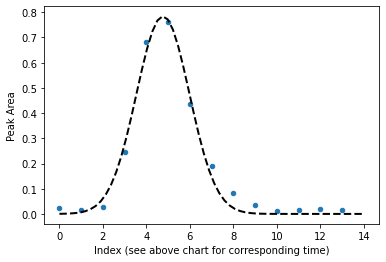

In [79]:
# Peak residence time - THIS WAS ALREADY DEFINED ABOVE
residence_time = 4 

# Find a single peak - Adjusted slightly to account for tailing
single_peak = ir_data.loc[(ir_data['Relative Time'] >= list(peak_pos)[0] - (residence_time/2-0.7)) 
                        & (ir_data['Relative Time'] <= list(peak_pos)[0] + (residence_time/2+0.1))]

# Fit Gaussian 
X = np.arange(0, len(single_peak))

pars, cov = curve_fit(f=gaussian, xdata=X, ydata=single_peak[peak_of_interest], p0=[5, -1.5, 2], bounds=(-np.inf, np.inf))

plt.scatter(X, single_peak[peak_of_interest], s=20, label='Data')
x = np.linspace(0, len(single_peak), 60)
plt.plot(x, gaussian(x, *pars), linestyle='--', linewidth=2, color='black')
plt.xlabel("Index (see above chart for corresponding time)")
plt.ylabel("Peak Area")
plt.show()

In [82]:
peak_of_interest = 'Peak at 1704 cm-1'

x = ir_data[peak_of_interest]
peak_list = [x for x in list(ir_data) if 'Peak' in x]

# Find peak height and position
peaks = find_peaks(x, prominence = peak_threshold)
peak_prominence = peaks[1]
peak_pos = ir_data['Relative Time'][peaks[0]]

# Make it a list
list_of_peaks = list(peak_pos)

df = []

for var in list_of_peaks:
    
    # Find a single peak
    single_peak = ir_data.loc[(ir_data['Relative Time'] >= var - (residence_time/2-0.7)) 
                            & (ir_data['Relative Time'] <= var + (residence_time/2+0.7))]

    # Fit Gaussian and find parameters
    X = np.arange(0, len(single_peak))
    pars, cov = curve_fit(f=gaussian, xdata=X, ydata=single_peak[peak_of_interest], p0=[5, -1, 2], bounds=(-np.inf, np.inf))

    # Find area (function, starting point, end point, args=arguments to use in function)
    peak_area = intg.quad(gaussian, 0, len(single_peak)-1, args=(pars[0],pars[1],pars[2]))

    df.append(pd.Series(peak_area))

fitted_area = pd.concat(df)

# Finalise dataframe
tmp = pd.DataFrame(peak_pos).reset_index(drop=True)
tmp2 = pd.DataFrame(fitted_area, columns=['Fitted Area']).reset_index(drop=True)
processed_ir_data = pd.concat([tmp,tmp2],axis=1)

In [100]:
peak_area[0]

0.5981422160063498